In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandasql as ps #executing sql queries off of pandas DF!

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Funnel Conversion

Given funnel with Interest, Email Sign Up all the way to Purchase with Conversion percentages for each as well as Expected percentages, which part of funnel would be the best place to invest in in order to get most efficient conversion?

# 2. CPA (Cost Per Acquisition)

Given cost to the adversiter, click rate, %conversions, and rate per ad, calculate CPA in $.

CPA = Cost to the Advertiser / Number of Conversions

It can be also be computed by dividing the cost to the advertiser by the product of the Numberr of impressions. Click-through-rate, and Conversion rate:


CPA = Cost to the Advertiser / (Number of ad impressions x CTR x CR)

# 3. Intermediate SQL


Screen Shot 2020-12-16 at 5.15.08 PM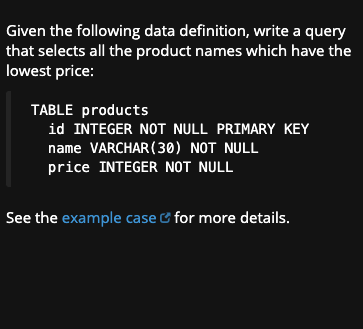

<!-- -- Suggested testing environment:
-- http://sqlite.online/

-- Example case create statement:
CREATE TABLE products ( 
  id INTEGER NOT NULL PRIMARY KEY,
  name VARCHAR(30) NOT NULL,
  price INTEGER NOT NULL
);

INSERT INTO products(id, name, price) VALUES(1, 'Hoverboard', 1000);
INSERT INTO products(id, name, price) VALUES(2, 'Toy Train', 500);
INSERT INTO products(id, name, price) VALUES(3, 'Longboard', 700);

-- Expected output:
-- name
-- ---------
-- Toy Train -->

https://app.testdome.com/files/resources/10/7493bfc7-f530-42ea-8a66-61e219c5f073.txt

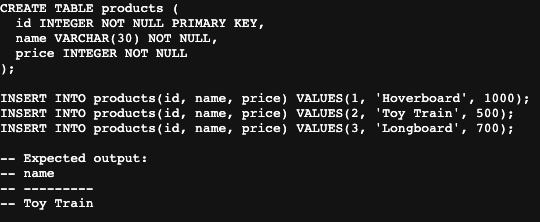

In [ ]:
products = pd.read_csv('../input/sql-questions/sqlite.3.csv')
products

In [ ]:
ps.sqldf("select name from products where price = (select min(price) from products)")

# 4. 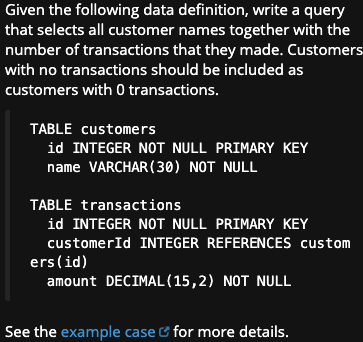

https://app.testdome.com/files/resources/10/09c19b32-f545-44b2-a289-ec9b4c41da3a.txt

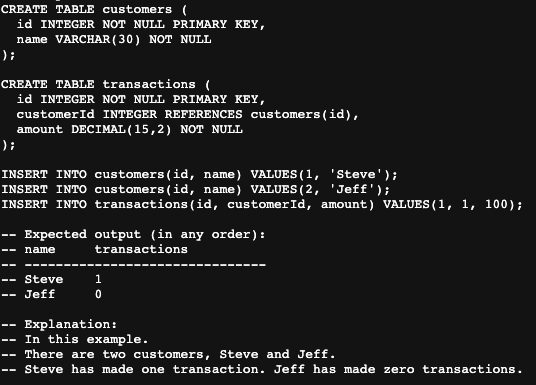

In [ ]:
customers = pd.read_csv('../input/customers2/sqlite.7 (1).csv')
customers

In [ ]:
transactions = pd.read_csv('../input/transactions2/sqlite.8.csv')
transactions

In [ ]:
ps.sqldf("with CTE as (select name, c.id, ifnull(count(customerid),0) as transactions from customers c left join transactions t on c.id=t.customerId group by 2,1 order by 3 desc) select name, transactions from CTE")

# 5. Screen Shot 2020-12-16 at 5.31.29 PM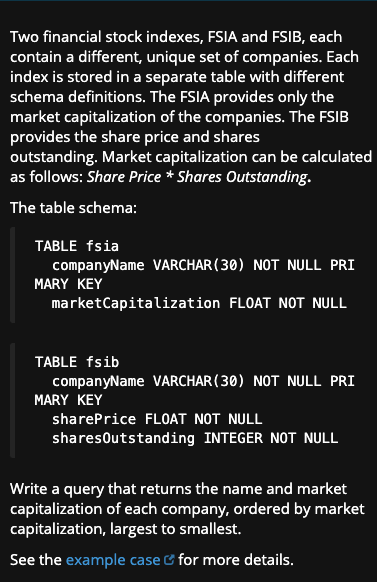

https://app.testdome.com/files/resources/19201/mergestockindexexample.txt

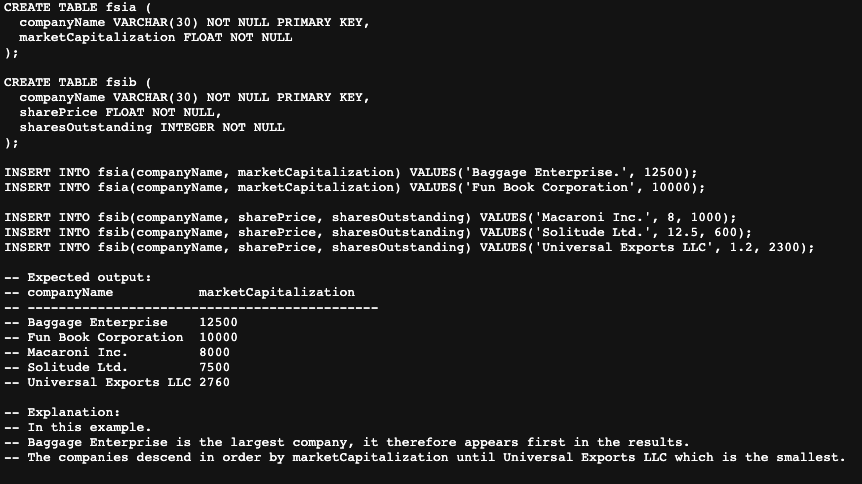

In [ ]:
fsia = pd.read_csv('../input/stocksdata1/sqlite.10.csv')
fsia

In [ ]:
fsib = pd.read_csv('../input/stocksdata2/sqlite.11.csv')
fsib

In [ ]:
ps.sqldf("with CTE as (select companyName, marketcapitalization from fsia UNION select companyName, sharePrice * sharesoutstanding as marketcapitalization from fsib) select companyname, marketcapitalization from CTE order by 2 desc")

# 6. 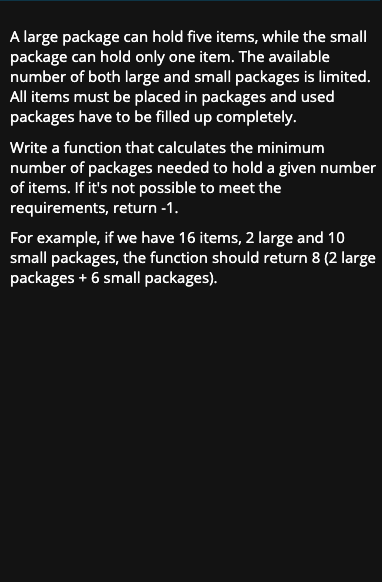

In [ ]:
def minimal_number_of_packages(items, available_large_packages, available_small_packages):
    if (available_large_packages*5 + available_small_packages) >= items:
        no_pkgs = 0
        while items >= available_large_packages*5:
            left = items - 5
            items = left
            no_pkgs+=1
        return no_pkgs + left
        

    else:
        return -1
    
print(minimal_number_of_packages(16, 2, 10))

# 7. 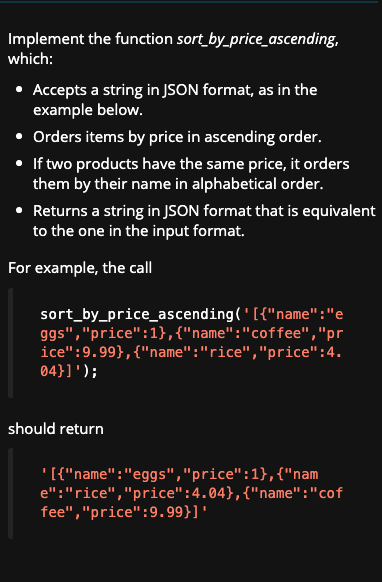

In [ ]:
import json

def sort_by_price_ascending(json_string):
    j = json.loads(json_string)  #changes string array JSON into array JSON
    res = sorted(j, key = lambda k: (k['price'], k['name']))
    return str(res)

print(sort_by_price_ascending('[{"name":"eggs","price":1},{"name":"coffee","price":9.99},{"name":"rice","price":4.04}]'))